# Parallel Impact-T run

This example shows how to set up the Impact-T input files and run script, but to leave the running to the user. 



In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from impact import Impact, template_dir
import os

In [3]:
ifile = os.path.join(template_dir,'lcls_injector/ImpactT.in')
os.path.exists(ifile)

True

In [4]:
# Make Impact object
I = Impact(ifile, verbose=False, use_tempdir=False, workdir='$HOME/Scratch/temp')

# Change some things
I.header['Np'] = 100000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 5e-13
I.stop = 3

# Set parallel domain
I.header['Npcol'] = 2
I.header['Nprow'] = 2

# Turn on MPI switches
I.use_mpi=True
I.impact_bin = '$IMPACTT_MPI_BIN'
I.mpi_exe = 'mpirun' 

I['use_mpi'] = True

I, I['use_mpi']

(<Impact with 100000 particles, stopping at 3 m, at 0x7f8dd5f9e100>, True)

In [5]:
# Write input to workdir
I.write_input()

# This will be the working path
I.path

'/Users/chrisonian/Scratch/temp'

# Run externally 
Parallel jobs often need to be run on special nodes and/or submitted to a queue, invoking the run script:

In [6]:
!cat /Users/chrisonian/Scratch/temp/run

mpirun -n 4 /Users/chrisonian/Code/impact/impactT/bin/ImpactTv2.1_mpi

Here we will do a quick run 

In [7]:
%%time
!cd $HOME/Scratch/temp;./run >log.txt

CPU times: user 12.9 s, sys: 3.73 s, total: 16.6 s
Wall time: 15min 6s


# Collect output

In [8]:
I.verbose=True
# Load output
I.load_output()

Loaded fort 30 : Fourth root of the fourth moments of the beam distribution
Loaded fort 25 : RMS Y information
Loaded fort 24 : RMS X information
Loaded fort 26 : RMS Z information
Loaded fort 28 : Load balance and loss diagnostics
Loaded fort 29 : Cube root of third moments of the beam distribution
Loaded fort 18 : Time and energy
Loaded fort 27 : Max amplitude information
Loaded fort 70 : Slice information of the final distribution
Loaded fort 60 : Slice information of the initial distribution
Loading particles
Loaded fort 40 : initial particle distribution at t = 0
Loaded fort 50 : final particle distribution projected to the centroid location of the bunch
Loaded write beam particles YAG02 fort.41
Converting z to t according to cathode_kinetic_energy_ref = 1.0 eV
Converted initial_particles to ParticleGroup
Converted final_particles to ParticleGroup
Converted YAG02 to ParticleGroup


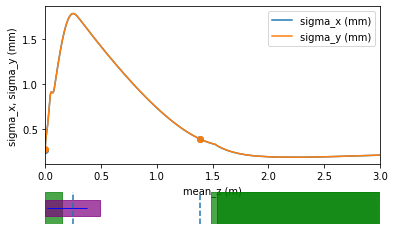

In [9]:
I.plot()

# Alternative: load into new object
If this notebook went out of scope, we'd need to load the output into a new object

In [10]:
I2 = Impact('$HOME/Scratch/temp/ImpactT.in', use_tempdir=False)

In [11]:
I2.load_output()

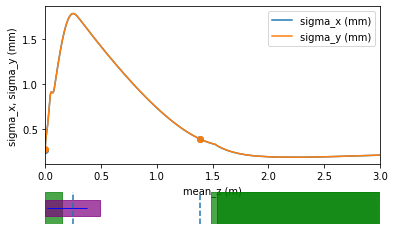

In [12]:
I2.plot()

# Archiving
Archiving is the same as in the simple example

In [13]:
#import h5py

#H5FILE = os.path.expandvars('$HOME/Scratch/temp/output.h5')
#with h5py.File(H5FILE, 'w') as h5:
afile = os.path.expandvars('$HOME/Scratch/temp/output.h5')
I2.archive(afile)


'/Users/chrisonian/Scratch/temp/output.h5'

In [14]:
# Cleanup
os.remove(afile)